# Applied Example of Socio-psychology: Rossmo Model

## Stuart Kind and the retroanalysis theory

Aka "surround the quarter, (s)he can't have gone too far".

No matter how many laws a criminal can defy, (s)he will never defy the Physics.

Suppose we're playing on a chessboard. There's a single king, thus he is free to move. We don't know where he is but we are aware of:
1. the cells he has already visited;
2. the time needed to reach those cells using the fastest route;

<figure>
    <img src="resources/Chess_Board.svg" alt="chessboard" style="width: 200px;"/>
    <figcaption style="text-align: center">Where is the king hiding?</figcaption>
</figure>

You may see he's hiding in F7. In fact, if the king is in F7 it will take exactly one move to reach E7 and G8 and so on.

In 1980, the professor **Stuart Kind** had to face a similar problem: given a list of murderers committed by a single serial killer and the killing times, find the criminal. What we are going to find is the **baricentrum** of the criminal.

According to this model, the slaughter of the Yorkshire lived in Bradford. Actually, the Police caught the killer while he was going to Sheffield (80 kilometres far from Bradford), but his residence was in a suburb of Bradford.

Not all criminals follow this patter, *but the large majority does*. If we the smallest circle containing all the crime scenes, we find out **the 87% of the offenders lived inside the circle and only 13% outside**. We call the former *marauders* and the latter *commuters*. There are many other variables to consider: housebreakers tend to be *commuters*, serial killers may enlarge their circle in time due to a grown sense of safety. In general, though, crimes tend to be done by residents instead of commuters.

## Rossmo's Formula
Let's dive into a criminal's mind.

1. I want to wrong-do.
2. I can't do this next to my house - somebody may recognise me.
3. I can't go too far - I may have a hard time when fleeing away.

The criminal is trying to avoid the so-called **buffer zone**, while following the **minimum effort** principle. Those two forces, discovered by **Paul and Patricia Brantingham** were then elaborated by Rossmo's formula. Thanks to this formula we can geoprofile the criminal and guess where (s)he lives. The formula is roughly this one:

$$p_{x,y} = k\cdot\sum_{n=1}^K{\left[\frac{\phi}{(\mid x-x_n\mid +\mid y-y_n\mid)^f} + \frac{(1-\phi)(B^{g-f})}{\mid 2B - (\mid x-x_n\mid + \mid y-y_n\mid )\mid^g} \right]}$$

Where:
* $\phi$ is an indicator function i.e. is equal to 1 if $\mid x-x_n \mid + \mid y - y_n\mid > B$ and 0 otherwise, that is it makes the term positive if the pixel lays inside the buffer zone and nullifies it otherwise.
* $K$ is the number of crimes
* $(x, y)$ are the coordinates in a 2D plan.
* $p_{x,y}$ is the colour of the pixel located at (x,y)
* $B$ is the buffer zone
* the rest ($f, g, k$) are just drawing parameters

Basically, this is an example of a creative model for Machine Learning. What we did was basically calculating and summating the inverse of the distances between any pixel and the crime scenes coordinates. If we execute the model and put a threshold on the result we obtain a classifying algorithm.

This is technically an unsupervised algorithm because we don't know where the criminal lives.

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
# Places I've been frequently
dataset = np.array([(38.119888, 13.358329), # Poste, Piazza G. Verdi
                       (38.120271, 13.361493), # Poste, Via Roma
                       (38.122011, 13.354435), # Poste, Via Mariano Stabile
                       (38.123881, 13.350402), # Poste, Via Brunetto Latini
                       (38.135180, 13.354118), # Our School :)
                       (38.133512, 13.344011) # Drago, Japanese Restaurant
                   ])
print("our current dataset: \n%s" % dataset)

longitudes = dataset[:,0]
latitudes = dataset[:,1]

# O(0,0) is in the lower-left corner
origin = 'lower'

width = 300
height = 300

x = np.linspace(38.11, 38.14, width)
y = np.linspace(13.34, 13.37, height)

our current dataset: 
[[ 38.119888  13.358329]
 [ 38.120271  13.361493]
 [ 38.122011  13.354435]
 [ 38.123881  13.350402]
 [ 38.13518   13.354118]
 [ 38.133512  13.344011]]


In [7]:
# here we're using the classic Euclidean distance instead of the Manhattan one
def distance(x, X): return np.linalg.norm(np.array(x)-np.array(X))

def rossmo_model(b, f, g, k):
    Z = np.zeros((width, height))
    for i in range(len(x)):
        for j in range(len(y)):
            lon, lat = x[i], y[j]
            for d in dataset:
                dist = distance(d, (lon, lat))
                Z[i][j] += ((dist > b) / dist**f) + ((dist<=b)*(b**(g-f)) / np.abs(2*b - dist))**g
            Z[i][j] *= k
        print("Row no %d computed" % i)
    return Z

Z = rossmo_model(0.0005, 0.5, 0.4, 0.008)
print("Rossmo predictions computed")

Row no 0 computed
Row no 1 computed
Row no 2 computed
Row no 3 computed
Row no 4 computed
Row no 5 computed
Row no 6 computed
Row no 7 computed
Row no 8 computed
Row no 9 computed
Row no 10 computed
Row no 11 computed
Row no 12 computed
Row no 13 computed
Row no 14 computed
Row no 15 computed
Row no 16 computed
Row no 17 computed
Row no 18 computed
Row no 19 computed
Row no 20 computed
Row no 21 computed
Row no 22 computed
Row no 23 computed
Row no 24 computed
Row no 25 computed
Row no 26 computed
Row no 27 computed
Row no 28 computed
Row no 29 computed
Row no 30 computed
Row no 31 computed
Row no 32 computed
Row no 33 computed
Row no 34 computed
Row no 35 computed
Row no 36 computed
Row no 37 computed
Row no 38 computed
Row no 39 computed
Row no 40 computed
Row no 41 computed
Row no 42 computed
Row no 43 computed
Row no 44 computed
Row no 45 computed
Row no 46 computed
Row no 47 computed
Row no 48 computed
Row no 49 computed
Row no 50 computed
Row no 51 computed
Row no 52 computed
Row

<IPython.core.display.Javascript object>


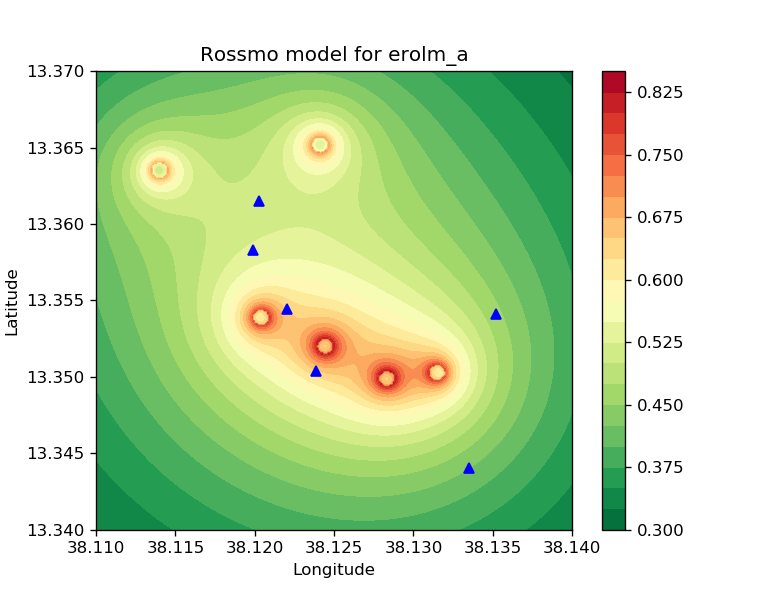

In [8]:
X, Y = np.meshgrid(x, y)

# Draw the contour curves
CS = plt.contourf(X, Y, Z, 20,
                  cmap=plt.cm.RdYlGn_r,
                  origin=origin)

# Draw the dataset
plt.plot(longitudes, latitudes, 'b^')

plt.title('Rossmo model for erolm_a')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
# ap.ax.set_ylabel('Residence probability')

plt.show()

Our model performed well! (erolm_a lives near Via Brunetto Latini).

Please note that the values in the legend bar do not (necessarily) represent probabilities.

Please bear in mind that the choises of the parameters are totally arbitrary. A supervised algorithm may try to seek after the best values with a custom error function, Generally speaking, however, criminal mind is extremely variable per case, or during the same case; an investigator could use some pre-chosen values that better suit the psychology of the subject.

The workflow of an investigator should be the following:

![workflow](profiling.svg)

Where NCP is the "Next Crime Point" and "APP" is the "Anchor Point Probability" (i.e. the residence).

Usually NCPs tend to happen in business areas whereas APP tend to lay in residential areas. Besides, points where the public forces are strong are good deterrants for crimes so a good Rossmo model should tackle this. See \[3\] for details.

References:

\[1\]: Kim Rossmo, Geographic Prophiling, Crc Press, Boca Raton 2000

\[2\]: David Canter, Geografia criminale sulle tracce del serial killer, Centro Scientifico Editore, Torino 2009

\[3\]: Team \#6469, Rossmo's Formula and the Bayesian Analysis - The Leading Way to Crime Location, Beijing University, Beijing 2010

\[4\]: Numb3rs, S01E01